<a href="https://colab.research.google.com/github/wulanasyifaa/Netflix-Data-Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# **Load Dataset**

In [ ]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
print("Number of unique values per column:")
print(df.nunique())

Number of unique values per column:
show_id         8790
type               2
title           8790
director        4527
cast            7679
country          749
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
description     8758
year_added        14
month_added       12
dtype: int64


# **Data Cleaning**

# Check Missing Value

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# Handling Missing Value

In [ ]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [ ]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

<ipython-input-10-c16dc916dc38>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-10-c16dc916dc38>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# **Netflix Analysis**

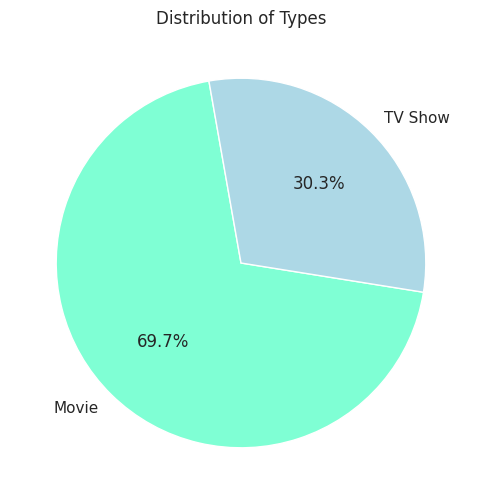

In [ ]:
type_counts = df['type'].value_counts()
colors = ['aquamarine', 'lightblue']
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=100, colors=colors)
plt.title('Distribution of Types')
plt.show()

The pie chart titled "Distribution of Types" shows the proportion of Movies and TV Shows in the dataset.

* Movies dominate the distribution, accounting for 69.7% of the content.
* TV Shows make up the remaining 30.3%, indicating they are less common compared to movies.

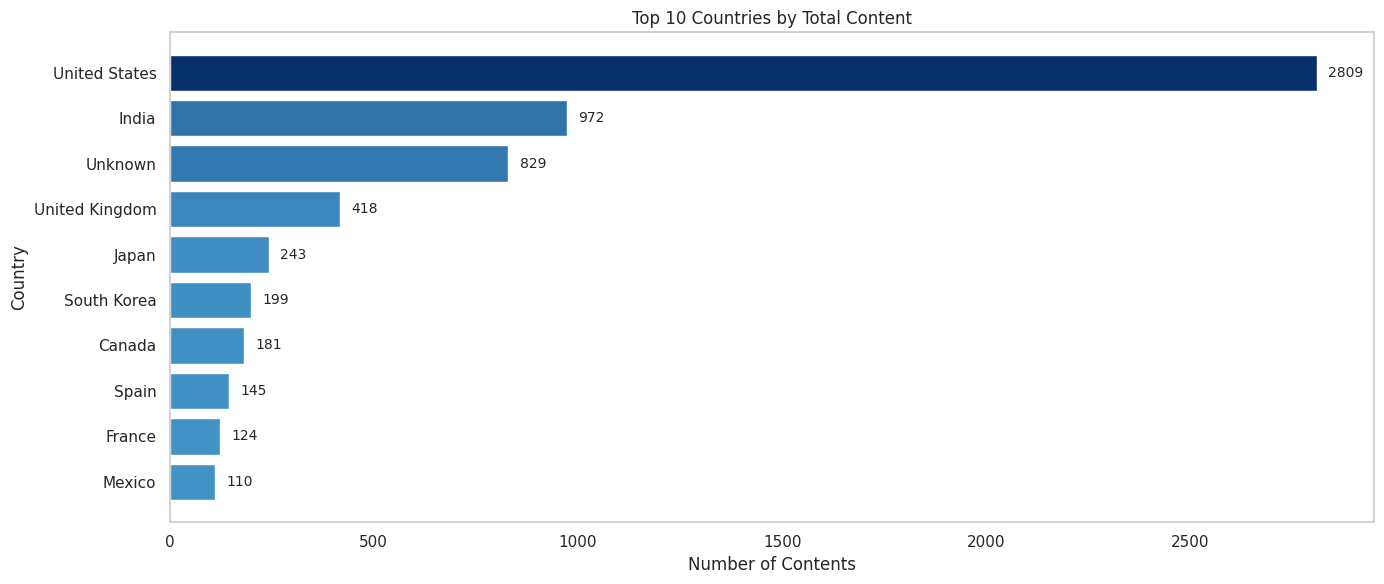

In [ ]:
total_contents = df['country'].value_counts().loc[top_countries]
total_contents = total_contents.sort_values(ascending=False)
norm = plt.Normalize(total_contents.min(), total_contents.max())
cmap = mcolors.LinearSegmentedColormap.from_list('blue_shades', ['#08306b', '#4292c6'])
colors = cmap(1 - norm(total_contents.values))
plt.figure(figsize=(14, 6))
bars = plt.barh(total_contents.index, total_contents.values, color=colors)
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(total_contents.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=10)
plt.title('Top 10 Countries by Total Content')
plt.xlabel('Number of Contents')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.grid(False)
plt.tight_layout()
plt.show()

* The United States emerges as the largest content contributor in the dataset, with a total of 2,809 titles, demonstrating a significant dominance compared to other countries.

* India ranks second in terms of content volume, followed by entries categorized as "Unknown", which refer to content for which the country of origin is not specified due to missing or unrecorded information in the dataset.

* Subsequent positions are occupied by the United Kingdom, Japan, and South Korea, respectively.

* Additionally, countries such as Canada, Spain, France, and Mexico also contribute to the overall content distribution, albeit to a lesser extent, yet their contributions remain noteworthy.

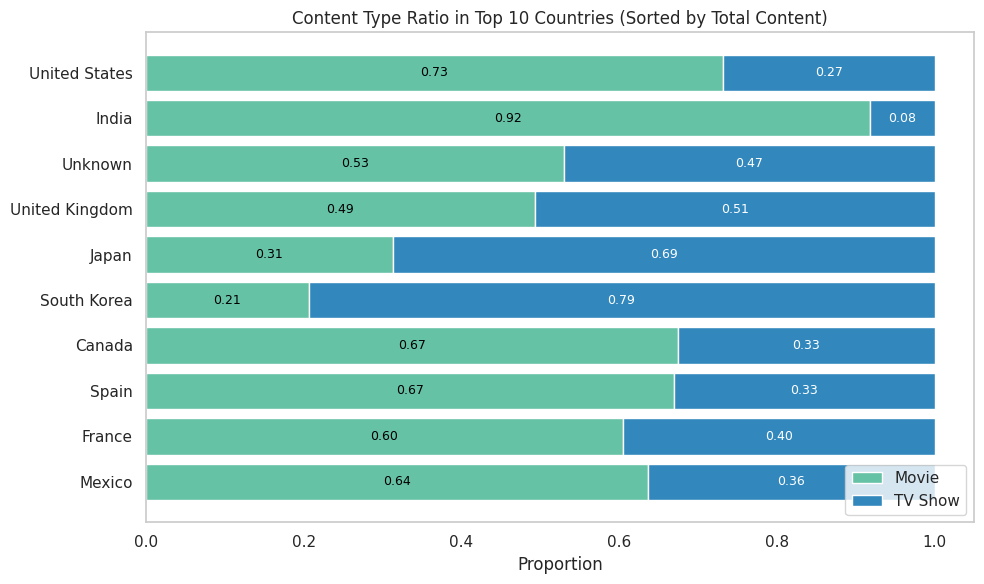

In [ ]:
total_contents = filtered_df['country'].value_counts()
type_ratio = type_ratio.loc[total_contents.index]
plt.figure(figsize=(10, 6))
bars = plt.barh(type_ratio.index, type_ratio['Movie'], color='#66c2a5', label='Movie')
bars2 = plt.barh(type_ratio.index, type_ratio['TV Show'],
                 left=type_ratio['Movie'], color='#3288bd', label='TV Show')
for i, country in enumerate(type_ratio.index):
    movie_prop = type_ratio.loc[country, 'Movie']
    tv_prop = type_ratio.loc[country, 'TV Show']
    plt.text(movie_prop / 2, i, f'{movie_prop:.2f}', va='center', ha='center', color='black', fontsize=9)
    plt.text(movie_prop + tv_prop / 2, i, f'{tv_prop:.2f}', va='center', ha='center', color='white', fontsize=9)
plt.title('Content Type Ratio in Top 10 Countries (Sorted by Total Content)')
plt.xlabel('Proportion')
plt.legend(loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

This chart illustrates the proportion of content types Movies and TV Shows across the top 10 countries contributing the most content to Netflix.

* The United States, while being the largest overall content contributor, has a more balanced ratio, with 73% movies and 27% TV shows.
* India has the highest proportion of movies, with 92% of its content being movies and only 8% TV shows. This suggests a strong preference or production bias towards movies in Indian content on Netflix.
* The "Unknown" category (entries with missing country data) shows a fairly even split: 53% movies and 47% TV shows.
* The United Kingdom is slightly skewed towards TV shows, with 51% being TV shows and 49% movies.
* Japan and South Korea have a significantly higher ratio of TV shows compared to movies: Japan: 69% TV shows and South Korea: 79% TV shows
* Canada, Spain, France, and Mexico all have a majority of their content as movies, with ratios ranging from 60–67%.

type        Movie  TV Show
year_added                
2008            1        1
2009            2        0
2010            1        0
2011           13        0
2012            3        0
2013            6        5
2014           19        5
2015           56       26
2016          251      175
2017          836      349
2018         1237      411
2019         1424      592
2020         1284      595
2021          993      505


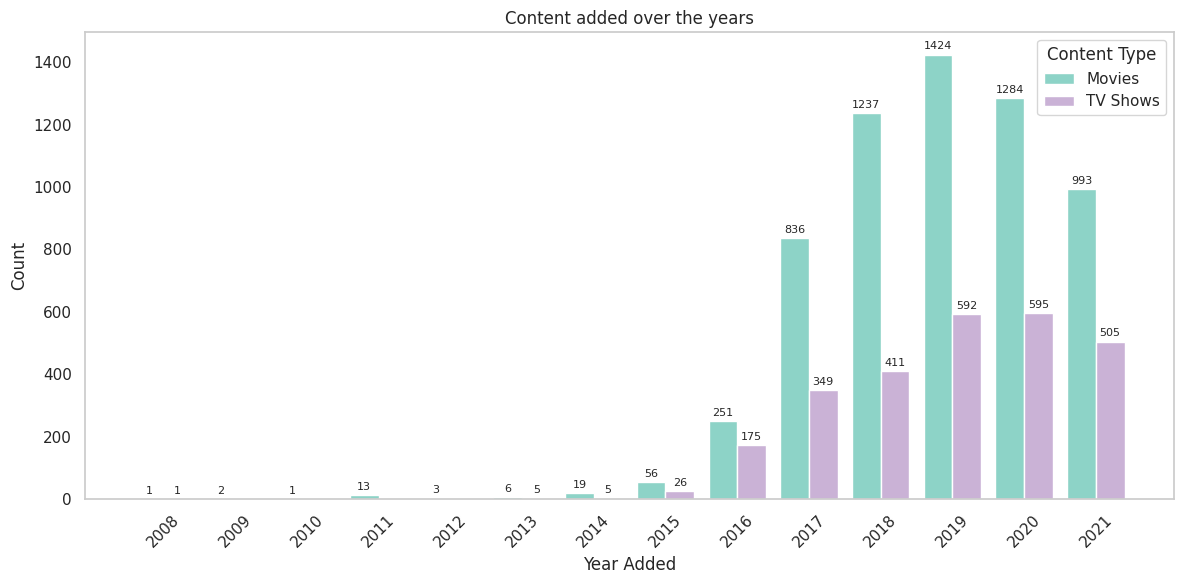

In [ ]:
yearly_counts = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
yearly_counts = yearly_counts.sort_index()
plt.figure(figsize=(12, 6))
bar1 = plt.bar(yearly_counts.index - 0.2, yearly_counts['Movie'], width=0.4, label='Movies', color='#8dd3c7')
bar2 = plt.bar(yearly_counts.index + 0.2, yearly_counts['TV Show'], width=0.4, label='TV Shows', color='#cab2d6')
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height + 10, str(int(height)),
                     ha='center', va='bottom', fontsize=8)
plt.title('Content added over the years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(yearly_counts.index, rotation=45)
plt.legend(title='Content Type')
plt.grid(False)
plt.tight_layout()
print(yearly_counts_table)
plt.show()

* **General Growth**

  There is a clear upward trend in the amount of content added over time, especially starting from 2015. The **most significant increases occurred between 2016 and 2019**.

* **Peak Years**
  
  **2019** is the peak year: 1,424 movies and 592 TV shows were added.
  
  Followed by:
  
  2018: 1,237 movies and 411 TV shows

  2020: 1,284 movies and 595 TV shows

* **Slight Decline**

  **In 2021, the number of added titles slightly decreased** to 993 movies and 505 TV shows. This might reflect changing content strategies, licensing shifts, or effects from the COVID-19 pandemic on production.

* **Content Type Comparison**
  
  Movies consistently dominate each year.

  TV Shows started gaining traction after 2015, with a noticeable rise in 2016 onwards.

  However, **TV Shows never outnumbered Movies in any year**.



Number and Percentage of TV Shows per Month:
             Total TV Shows  Percentage (%)
month_added                                
1                       192            7.21
2                       180            6.76
3                       213            8.00
4                       214            8.03
5                       193            7.24
6                       236            8.86
7                       262            9.83
8                       236            8.86
9                       251            9.42
10                      215            8.07
11                      207            7.77
12                      265            9.95


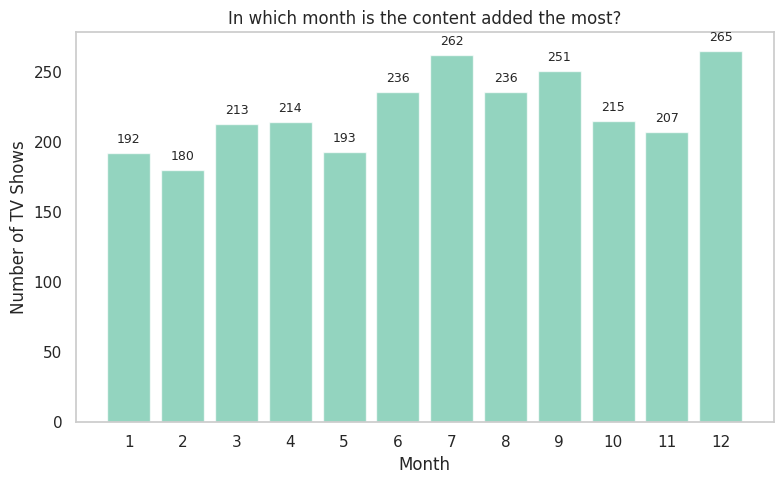

In [ ]:
df['month_added'] = df['date_added'].dt.month
monthly_counts = df[df['type'] == 'TV Show']['month_added'].value_counts().sort_index()
monthly_percent = (monthly_counts / monthly_counts.sum() * 100).round(2)
monthly_summary = pd.DataFrame({
    'Total TV Shows': monthly_counts,
    'Percentage (%)': monthly_percent
})
print("Number and Percentage of TV Shows per Month:")
print(monthly_summary)
plt.figure(figsize=(8, 5))
bars = plt.bar(monthly_counts.index, monthly_counts.values, color='#66c2a5', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height),
             ha='center', va='bottom', fontsize=9)
plt.title('In which month is the content added the most?')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.xticks(range(1, 13))
plt.grid(False)
plt.tight_layout()
plt.show()

The bar chart and accompanying table display how many TV shows were added to Netflix in each month, along with their percentage share of the total.

* **Top Months for Content Addition**
  
  The month with the highest number of TV shows added is **December**, with 265 titles (9.95% of the total). It is followed by:

  July: 262 titles (9.83%)

  September: 251 titles (9.42%)

  August and June (tied): 236 titles each (both 8.86%)

* **Lowest Months**
  
  The lowest number of additions occurred in:

  February: 180 titles (6.76%)

  January: 192 titles (7.21%)



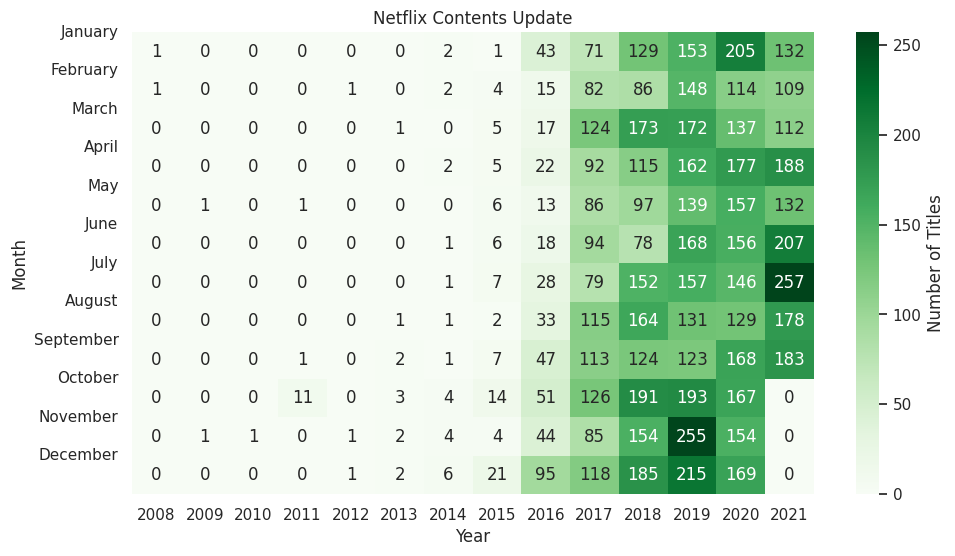

In [ ]:
data_pivot = df.groupby(['month_added', 'year_added']).size().unstack(fill_value=0)
plt.figure(figsize=(11, 6))
sns.heatmap(data_pivot, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Number of Titles'})
plt.title('Netflix Contents Update')
plt.ylabel('Month')
plt.xlabel('Year')
plt.yticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June',
                                    'July', 'August', 'September', 'October', 'November', 'December'], rotation=0)
plt.show()

This heatmap visualizes the number of Netflix titles added each month from 2008 to 2021. The darker the green, the more titles were added in that month and year.

* **Trends Over Time**
  
  Sharp Growth Post-2015: A significant increase in content additions begins in 2016 and accelerates through 2019.

  Peak Year:

  2019 stands out as the peak year with consistently high title additions across many months.

  July 2019 and December 2019 have the darkest cells, indicating they had the highest content additions:

  July: 257 titles

  December: 255 titles

* **Month-by-Month Observations**
  
  July and December often show dark green shades, especially between 2018–2020, confirming these months are content-rich periods.

  June, September, and November also show consistently high values during the peak years.

  Early months like January to April have lighter shades in most years, suggesting lower activity.

* **Decline in 2021**

  A noticeable drop in new content additions appears in 2021, especially in the second half of the year (many cells are empty or zero).

  This may reflect:

  Changes in Netflix’s content acquisition strategy

  Delays due to the COVID-19 pandemic

  More selective releases or reporting delays



<ipython-input-76-c15751eb64f1>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




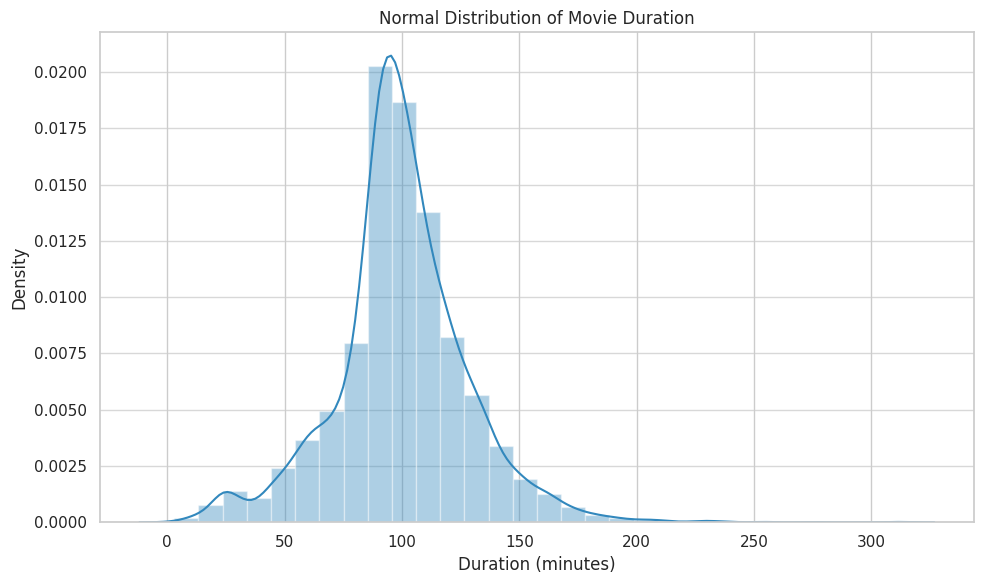

In [ ]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
sns.distplot(df_movies['duration'], kde=True, color='#3288bd', bins=30)
plt.title('Normal Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

* The peak (mode) is around 90–100 minutes, indicating that most Netflix movies fall within this typical range.

* A few movies are significantly longer—over 150 minutes, even up to 300 minutes—but these are rare.

* Very short movies (under 60 minutes) exist but are not common.

Top 10 Genre:
listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


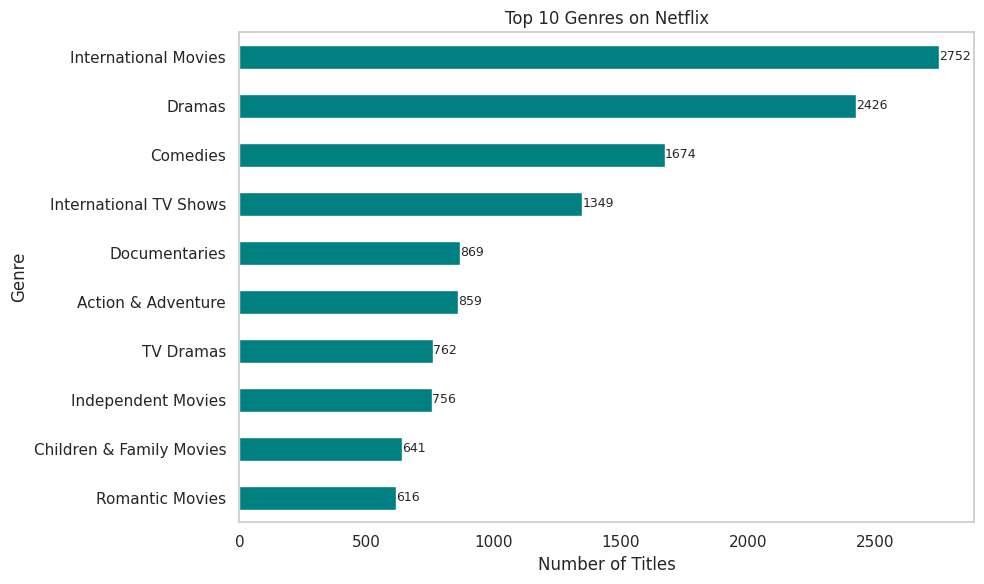

In [ ]:
genres = df['listed_in'].str.split(', ').explode()
genre_counts = genres.value_counts()
top_10_genres = genre_counts.nlargest(10)
print("Top 10 Genre:")
print(top_10_genres)
plt.figure(figsize=(10, 6))
bars = top_10_genres.plot(kind='barh', color='teal')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left', fontsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()

**Top Genres**

This horizontal bar chart shows the 10 most common genres of content available on Netflix, based on the number of titles in each genre, with the five leading genres being:
1. International Movies – 2,752 titles
2. Dramas – 2,426 titles
3. Comedies – 1,674 titles
4. International TV Shows – 1,349 titles
5. Documentaries – 869 titles


<ipython-input-109-8d35ad67f297>:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



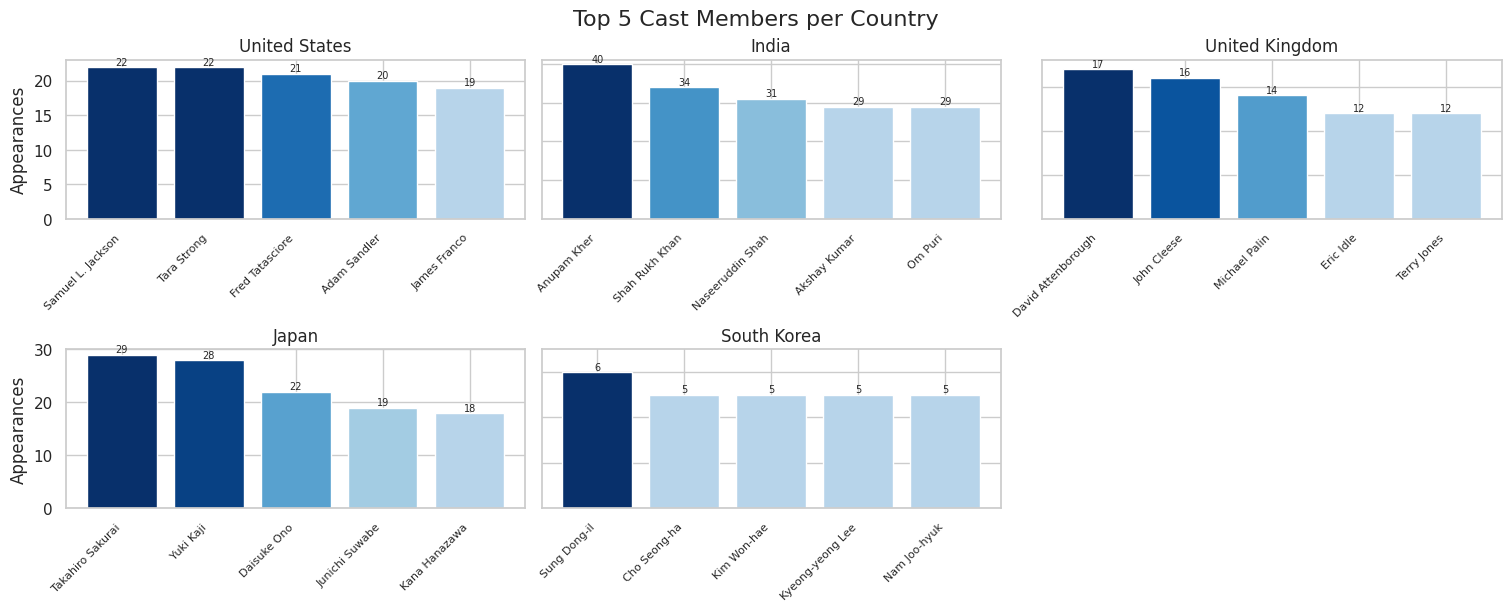

In [ ]:
cmap_full = cm.get_cmap('Blues', 256)
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_blues", cmap_full(np.linspace(0.3, 1, 256)))
fig, axes = plt.subplots(2, 3, figsize=(15, 6), constrained_layout=True)
axes = axes.flatten()
for i, country in enumerate(top_5_countries_overall):
    if country in top_cast_per_country:
        cast_data = top_cast_per_country[country]
        cast_names = list(cast_data.keys())
        cast_counts = list(cast_data.values())
        norm = mcolors.Normalize(vmin=min(cast_counts), vmax=max(cast_counts))
        bar_colors = [custom_cmap(norm(count)) for count in cast_counts]
        ax = axes[i]
        bars = ax.bar(cast_names, cast_counts, color=bar_colors)
        ax.set_title(f'{country}')
        ax.set_xticks(range(len(cast_names)))
        ax.set_xticklabels(cast_names, rotation=45, ha='right', fontsize=8)
        ax.set_ylim(0, max(cast_counts) + 1)
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=7)
        if i % 3 == 0:
            ax.set_ylabel('Appearances')
        else:
            ax.set_yticklabels([])
if len(top_5_countries_overall) < 6:
    fig.delaxes(axes[5])
fig.suptitle('Top 5 Cast Members per Country', fontsize=16)
plt.show()

The chart highlights the **top five most frequently appearing cast members** from the five countries with the highest number of titles produced on Netflix: the United States, India, United Kingdom, Japan, and South Korea.

* **United States**: **Samuel L. Jackson and Tara Strong** both appear 22 times, leading the U.S. list. Fred Tatasciore follows closely with 21 appearances, while Adam Sandler and James Franco have 20 and 19 appearances respectively. This reflects a mix of actors from both live-action and animated content.

* **India**: **Anupam Kher** tops the chart with a remarkable 40 appearances, followed by Shah Rukh Khan (34), Naseeruddin Shah (31), and both Akshay Kumar and Om Puri with 29 each. These names are iconic figures in Indian cinema, indicating their strong presence on the platform.

* **United Kingdom**: **David Attenborough** leads with 17 appearances, known for his documentaries. John Cleese (16), Michael Palin (14), and both Eric Idle and Terry Jones (12) are notable members of the Monty Python group, showing the popularity of British comedy.

* **Japan**: **Takahiro Sakurai** (29) and Yuki Kaji (28) dominate, followed by Daisuke Ono (22), Junichi Suwabe (19), and Kana Hanazawa (18). All are well-known voice actors, suggesting that anime titles make up a significant portion of Japanese content on Netflix.

* **South Korea**: The cast members have fewer total appearances compared to other countries. **Sung Dong-il** has the most with 6, followed by Cho Seong-ha, Kim Won-hae, Kyeong-yeong Lee, and Nam Joo-hyuk, each with 5 appearances. This indicates a broader variety of actors being used across fewer recurring roles.

<ipython-input-108-669c444a556b>:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



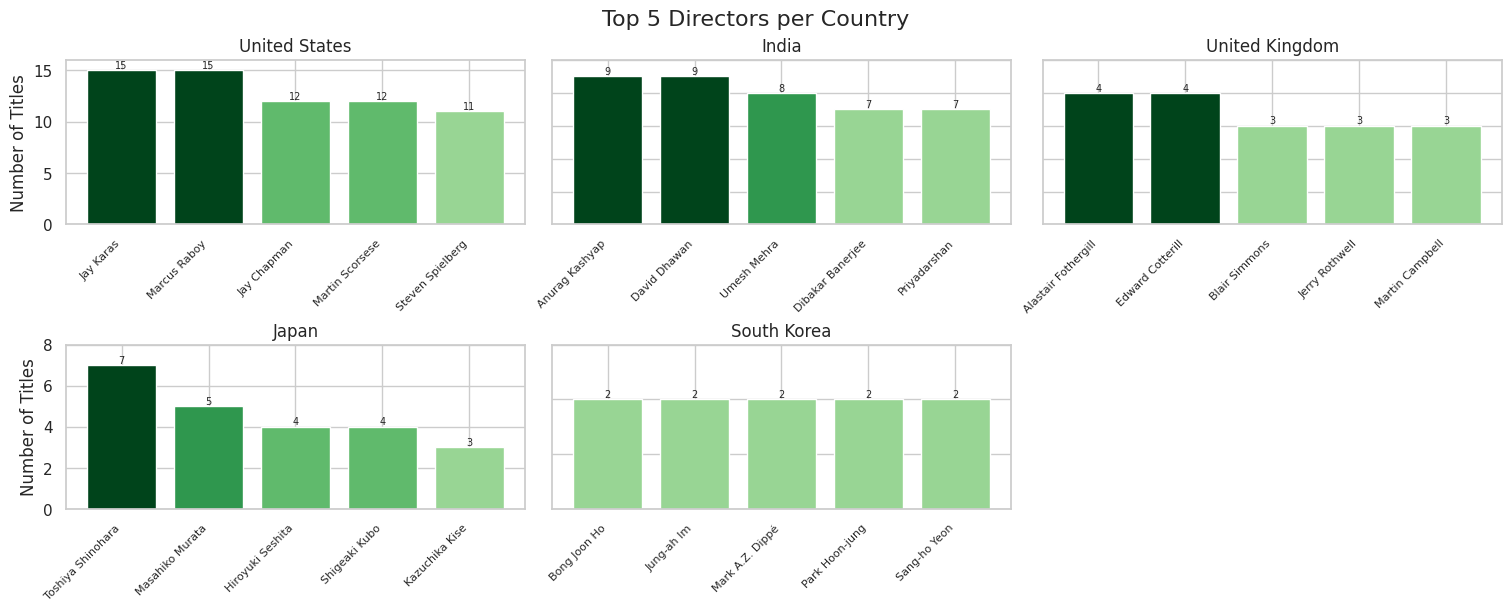

In [ ]:
greens = cm.get_cmap('Greens', 256)
custom_green = mcolors.LinearSegmentedColormap.from_list("custom_greens", greens(np.linspace(0.4, 1, 256)))
fig, axes = plt.subplots(2, 3, figsize=(15, 6), constrained_layout=True)
axes = axes.flatten()
for i, country in enumerate(top_5_countries_overall):
    if country in top_directors_per_country:
        director_data = top_directors_per_country[country]
        names = list(director_data.keys())
        counts = list(director_data.values())
        norm = mcolors.Normalize(vmin=min(counts), vmax=max(counts))
        colors = [custom_green(norm(count)) for count in counts]
        ax = axes[i]
        bars = ax.bar(names, counts, color=colors)
        ax.set_title(f'{country}')
        ax.set_xticks(range(len(names)))
        ax.set_xticklabels(names, rotation=45, ha='right', fontsize=8)
        ax.set_ylim(0, max(counts) + 1)
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=7)
        if i % 3 == 0:
            ax.set_ylabel('Number of Titles')
        else:
            ax.set_yticklabels([])
if len(top_5_countries_overall) < 6:
    fig.delaxes(axes[5])
fig.suptitle('Top 5 Directors per Country', fontsize=16)
plt.show()

The chart showcases the **top 5 directors based on the number of Netflix titles** from the five countries with the highest content production: the United States, India, United Kingdom, Japan, and South Korea.

* **United States**:** Jay Karas and Marcus Raboy** lead with 15 titles each, followed by Jay Chapman and Martin Scorsese with 12 each, and Steven Spielberg with 11. This highlights a mix of mainstream filmmakers and comedy/live performance directors.

* **India**: **Anurag Kashyap and David Dhawan** both top the list with 9 titles. Umesh Mehra follows with 8, while Dibakar Banerjee and Priyadarshan each have 7. These directors are well-known figures in Bollywood, covering genres from drama to action.

* **United Kingdom**: The U.K. has fewer titles per director compared to the U.S. or India. **Alastair Fothergill and Edward Cotterill** each directed 4 titles, while Blair Simmons, Jerry Rothwell, and Martin Campbell each have 3. The names suggest a strong representation in documentary and thriller genres.

* **Japan**: **Toshiya Shinohara** is the most prolific with 7 titles, followed by Masahiko Murata (5), and Hiroyuki Seshita, Shigeaki Kubo (4 each), and Kazuchika Kise (3). Most are associated with anime, reinforcing Japan's dominance in animated content on Netflix.

* **South Korea**: South Korean directors show a more evenly distributed output, with all five—**Bong Joon Ho**, Jung-ah Im, Mark A.Z. Dippé, Park Hoon-jung, and Sang-ho Yeon—having 2 titles each. This suggests a broader range of filmmakers with fewer repeated credits, possibly due to the diverse storytelling found in K-dramas and Korean cinema.

